In [5]:
%matplotlib inline

In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read reports
Note: Each report contains data for the previous year

In [7]:
file_path = "/Users/ziza/Documents/Coding/GitHub/World_Happiness_Report/Source Data/"

### Clean report 2022

In [8]:
df_2022 = pd.read_excel(file_path + "2022.xls")
df_2022.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.8210,7.886425,7.755575,2.518052,1.891628,1.258108,0.775206,0.735590,0.108733,0.533658
1,2,Denmark,7.6362,7.709897,7.562503,2.225632,1.952595,1.242681,0.776644,0.718918,0.187626,0.532079
2,3,Iceland,7.5575,7.651076,7.463924,2.320185,1.935726,1.319914,0.802622,0.718194,0.269616,0.191204
3,4,Switzerland,7.5116,7.586394,7.436806,2.152746,2.025970,1.226074,0.822048,0.676947,0.146822,0.461004
4,5,Netherlands,7.4149,7.471265,7.358534,2.136937,1.944578,1.205848,0.786738,0.650682,0.271076,0.419083


In [9]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        147 non-null    int64  
 1   Country                                     147 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [10]:
# show rows with null values
df_2022[df_2022.isnull().any(axis=1)]

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
146,147,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# drop null rows
df_2022.dropna(inplace=True)

In [12]:
# Calculate Dystopia and residual in separate columns
# Paste reported year
df_2022['Dystopia'] = 1.83
df_2022['Residual'] = df_2022['Dystopia (1.83) + residual'] - 1.83
df_2022['Year'] = 2021
df_2022.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia,Residual,Year
0,1,Finland,7.8210,7.886425,7.755575,2.518052,1.891628,1.258108,0.775206,0.735590,0.108733,0.533658,1.83,0.688052,2021
1,2,Denmark,7.6362,7.709897,7.562503,2.225632,1.952595,1.242681,0.776644,0.718918,0.187626,0.532079,1.83,0.395632,2021
2,3,Iceland,7.5575,7.651076,7.463924,2.320185,1.935726,1.319914,0.802622,0.718194,0.269616,0.191204,1.83,0.490185,2021
3,4,Switzerland,7.5116,7.586394,7.436806,2.152746,2.025970,1.226074,0.822048,0.676947,0.146822,0.461004,1.83,0.322746,2021
4,5,Netherlands,7.4149,7.471265,7.358534,2.136937,1.944578,1.205848,0.786738,0.650682,0.271076,0.419083,1.83,0.306937,2021


In [13]:
# All reports should have the same columns
rename_col = ['Country', 'Year',
    'Happiness score', 'Dystopia', 'Residual', 
    'Explained by: GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption']

In [14]:
# drop unnecessary columns
col = ['Country', 'Year',
    'Happiness score', 'Dystopia', 'Residual', 
    'Explained by: GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption']
df_2022 = df_2022[col].rename(columns=dict(zip(col, rename_col)))
df_2022.head()

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,2021,7.8210,1.83,0.688052,1.891628,1.258108,0.775206,0.735590,0.108733,0.533658
1,Denmark,2021,7.6362,1.83,0.395632,1.952595,1.242681,0.776644,0.718918,0.187626,0.532079
2,Iceland,2021,7.5575,1.83,0.490185,1.935726,1.319914,0.802622,0.718194,0.269616,0.191204
3,Switzerland,2021,7.5116,1.83,0.322746,2.025970,1.226074,0.822048,0.676947,0.146822,0.461004
4,Netherlands,2021,7.4149,1.83,0.306937,1.944578,1.205848,0.786738,0.650682,0.271076,0.419083


### Clean report 2021

In [15]:
df_2021 = pd.read_excel(file_path + "2021.xls")
df_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,2.430343,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524,3.253415
1,Denmark,Western Europe,7.6195,0.034657,7.687428,7.551572,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,2.430343,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993,2.868296
2,Switzerland,Western Europe,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,2.430343,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019,2.839148
3,Iceland,Western Europe,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,2.430343,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940,2.966945
4,Netherlands,Western Europe,7.4640,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,2.430343,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531,2.797818


In [16]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [17]:
# Calculate Residual in separate column
# Paste reported year
df_2021['Residual'] = df_2021['Dystopia + residual'] - df_2021['Ladder score in Dystopia']
df_2021['Year'] = 2020
df_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Residual,Year
0,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.000000,0.949268,...,2.430343,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524,3.253415,0.823072,2020
1,Denmark,Western Europe,7.6195,0.034657,7.687428,7.551572,10.933176,0.954410,72.699753,0.945639,...,2.430343,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993,2.868296,0.437953,2020
2,Switzerland,Western Europe,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,0.918788,...,2.430343,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019,2.839148,0.408805,2020
3,Iceland,Western Europe,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.000000,0.955123,...,2.430343,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940,2.966945,0.536602,2020
4,Netherlands,Western Europe,7.4640,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,0.913116,...,2.430343,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531,2.797818,0.367475,2020


In [18]:
# store regional indicator to assign region to the final table
region_mapping = df_2021[['Country name', 'Regional indicator']]
region_mapping

,Country name,Regional indicator
0,Finland,Western Europe
1,Denmark,Western Europe
2,Switzerland,Western Europe
3,Iceland,Western Europe
4,Netherlands,Western Europe
...,...,...
144,Lesotho,Sub-Saharan Africa
145,Botswana,Sub-Saharan Africa
146,Rwanda,Sub-Saharan Africa
147,Zimbabwe,Sub-Saharan Africa


In [19]:
# Drop unnecessary columns
# Rename columns to align with other dfs
col = ['Country name', 'Year',  
    'Ladder score', 'Ladder score in Dystopia', 
    'Residual', 'Explained by: Log GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption']
df_2021 = df_2021[col].rename(columns=dict(zip(col, rename_col)))
df_2021.head()

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,2020,7.8421,2.430343,0.823072,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524
1,Denmark,2020,7.6195,2.430343,0.437953,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993
2,Switzerland,2020,7.5715,2.430343,0.408805,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019
3,Iceland,2020,7.5539,2.430343,0.536602,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940
4,Netherlands,2020,7.4640,2.430343,0.367475,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531


### Clean report 2020

In [20]:
df_2020 = pd.read_excel(file_path + "2020.xls")
df_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900826,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [21]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [22]:
# store regional indicator to assign region to the final table
region_mapping = df_2020[['Country name', 'Regional indicator']]
region_mapping

,Country name,Regional indicator
0,Finland,Western Europe
1,Denmark,Western Europe
2,Switzerland,Western Europe
3,Iceland,Western Europe
4,Norway,Western Europe
...,...,...
148,Central African Republic,Sub-Saharan Africa
149,Rwanda,Sub-Saharan Africa
150,Zimbabwe,Sub-Saharan Africa
151,South Sudan,Sub-Saharan Africa


In [23]:
# Calculate Residual in separate column
# Paste reported year
df_2020['Residual'] = df_2020['Dystopia + residual'] - df_2020['Ladder score in Dystopia']
df_2020['Year'] = 2019
df_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Residual,Year
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900826,0.949172,...,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,0.790518,2019
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,0.460424,2019
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,0.377951,2019
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,0.488371,2019
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,0.195950,2019


In [24]:
# Drop unnecessary columns
# Rename columns to align with other dfs
col = ['Country name', 'Year',  
    'Ladder score', 'Ladder score in Dystopia', 
    'Residual', 'Explained by: Log GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption']
df_2020 = df_2020[col].rename(columns=dict(zip(col, rename_col)))
df_2020.head()

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,2019,7.8087,1.972317,0.790518,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,2019,7.6456,1.972317,0.460424,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Switzerland,2019,7.5599,1.972317,0.377951,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,Iceland,2019,7.5045,1.972317,0.488371,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Norway,2019,7.4880,1.972317,0.195950,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101


### Clean report 2019

In [25]:
df_2019 = pd.read_excel(file_path + "2019.xls", 'Figure2.6')
df_2019.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.7689,7.829888,7.707912,2.713678,1.340243,1.587276,0.986145,0.595895,0.152708,0.392913
1,Denmark,7.6001,7.666658,7.533542,2.392891,1.383439,1.572595,0.996019,0.592356,0.252320,0.410473
2,Norway,7.5539,7.615639,7.492160,2.240764,1.487767,1.581548,1.028123,0.603500,0.271304,0.340884
3,Iceland,7.4936,7.613283,7.373917,2.400876,1.380163,1.623651,1.025653,0.590905,0.354356,0.117980
4,Netherlands,7.4876,7.542098,7.433102,2.392895,1.396020,1.521903,0.999314,0.557075,0.322440,0.297978


In [26]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     156 non-null    object 
 1   Happiness score                             156 non-null    float64
 2   Whisker-high                                156 non-null    float64
 3   Whisker-low                                 156 non-null    float64
 4   Dystopia (1.88) + residual                  156 non-null    float64
 5   Explained by: GDP per capita                156 non-null    float64
 6   Explained by: Social support                156 non-null    float64
 7   Explained by: Healthy life expectancy       156 non-null    float64
 8   Explained by: Freedom to make life choices  156 non-null    float64
 9   Explained by: Generosity                    156 non-null    float64
 10  Explained by: 

In [27]:
# Calculate Dystopia and Residual in separate columns
# Paste reported year
df_2019['Dystopia'] = 1.88
df_2019['Residual'] = df_2019['Dystopia (1.88) + residual'] - 1.88
df_2019['Year'] = 2018
df_2019.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia,Residual,Year
0,Finland,7.7689,7.829888,7.707912,2.713678,1.340243,1.587276,0.986145,0.595895,0.152708,0.392913,1.88,0.833678,2018
1,Denmark,7.6001,7.666658,7.533542,2.392891,1.383439,1.572595,0.996019,0.592356,0.252320,0.410473,1.88,0.512891,2018
2,Norway,7.5539,7.615639,7.492160,2.240764,1.487767,1.581548,1.028123,0.603500,0.271304,0.340884,1.88,0.360764,2018
3,Iceland,7.4936,7.613283,7.373917,2.400876,1.380163,1.623651,1.025653,0.590905,0.354356,0.117980,1.88,0.520876,2018
4,Netherlands,7.4876,7.542098,7.433102,2.392895,1.396020,1.521903,0.999314,0.557075,0.322440,0.297978,1.88,0.512895,2018


In [28]:
# Drop unnecessary columns
# Rename columns to align with other dfs
col = ['Country', 'Year',  
    'Happiness score', 'Dystopia', 
    'Residual', 'Explained by: GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption']
df_2019 = df_2019[col].rename(columns=dict(zip(col, rename_col)))
df_2019.head()

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,2018,7.7689,1.88,0.833678,1.340243,1.587276,0.986145,0.595895,0.152708,0.392913
1,Denmark,2018,7.6001,1.88,0.512891,1.383439,1.572595,0.996019,0.592356,0.252320,0.410473
2,Norway,2018,7.5539,1.88,0.360764,1.487767,1.581548,1.028123,0.603500,0.271304,0.340884
3,Iceland,2018,7.4936,1.88,0.520876,1.380163,1.623651,1.025653,0.590905,0.354356,0.117980
4,Netherlands,2018,7.4876,1.88,0.512895,1.396020,1.521903,0.999314,0.557075,0.322440,0.297978


### Clean report 2018

In [29]:
df_2018 = pd.read_excel(file_path + "2018.xls", "Figure2.2")
df_2018.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.92) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Finland,7.6321,7.694913,7.569287,2.595186,1.305095,1.592134,0.874454,0.680633,0.191638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,country
1,Norway,7.5937,7.657077,7.530323,2.383242,1.455627,1.582340,0.860763,0.686420,0.285636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Finland
2,Denmark,7.5553,7.623292,7.487309,2.370179,1.351153,1.590453,0.867933,0.683251,0.284392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Iceland,7.4952,7.592534,7.397867,2.425990,1.343301,1.644378,0.913802,0.676502,0.353233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark
4,Switzerland,7.4873,7.569994,7.404606,2.319529,1.419727,1.548998,0.927076,0.659779,0.255525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iceland


In [30]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     156 non-null    object 
 1   Happiness score                             156 non-null    float64
 2   Whisker-high                                156 non-null    float64
 3   Whisker-low                                 156 non-null    float64
 4   Dystopia (1.92) + residual                  156 non-null    float64
 5   Explained by: GDP per capita                156 non-null    float64
 6   Explained by: Social support                156 non-null    float64
 7   Explained by: Healthy life expectancy       156 non-null    float64
 8   Explained by: Freedom to make life choices  156 non-null    float64
 9   Explained by: Generosity                    156 non-null    float64
 10  Explained by: 

In [31]:
# Calculate Dystopia and Residual in separate columns
# Paste reported year
df_2018['Dystopia'] = 1.92
df_2018['Residual'] = df_2018['Dystopia (1.92) + residual'] - 1.92
df_2018['Year'] = 2017
df_2018.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.92) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Dystopia,Residual,Year
0,Finland,7.6321,7.694913,7.569287,2.595186,1.305095,1.592134,0.874454,0.680633,0.191638,...,NaN,NaN,NaN,NaN,NaN,NaN,country,1.92,0.675186,2017
1,Norway,7.5937,7.657077,7.530323,2.383242,1.455627,1.582340,0.860763,0.686420,0.285636,...,NaN,NaN,NaN,NaN,NaN,NaN,Finland,1.92,0.463242,2017
2,Denmark,7.5553,7.623292,7.487309,2.370179,1.351153,1.590453,0.867933,0.683251,0.284392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.450179,2017
3,Iceland,7.4952,7.592534,7.397867,2.425990,1.343301,1.644378,0.913802,0.676502,0.353233,...,NaN,NaN,NaN,NaN,NaN,NaN,Denmark,1.92,0.505990,2017
4,Switzerland,7.4873,7.569994,7.404606,2.319529,1.419727,1.548998,0.927076,0.659779,0.255525,...,NaN,NaN,NaN,NaN,NaN,NaN,Iceland,1.92,0.399529,2017


In [32]:
# Drop unnecessary columns
# Rename columns to align with other dfs
col = ['Country', 'Year',  
    'Happiness score', 'Dystopia', 
    'Residual', 'Explained by: GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption']
df_2018 = df_2018[col].rename(columns=dict(zip(col, rename_col)))
df_2018.head()

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,2017,7.6321,1.92,0.675186,1.305095,1.592134,0.874454,0.680633,0.191638,0.392961
1,Norway,2017,7.5937,1.92,0.463242,1.455627,1.582340,0.860763,0.686420,0.285636,0.339687
2,Denmark,2017,7.5553,1.92,0.450179,1.351153,1.590453,0.867933,0.683251,0.284392,0.407917
3,Iceland,2017,7.4952,1.92,0.505990,1.343301,1.644378,0.913802,0.676502,0.353233,0.138019
4,Switzerland,2017,7.4873,1.92,0.399529,1.419727,1.548998,0.927076,0.659779,0.255525,0.356677


In [33]:
# show rows with null
df_2018[df_2018.isnull().any(axis=1)]

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
156,NaN,2017,NaN,1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# drop null rows
df_2018.dropna(inplace=True)
df_2018.tail()

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
151,Yemen,2017,3.3549,1.92,-0.813526,0.441527,1.072613,0.343216,0.243870,0.083092,0.064146
152,Tanzania,2017,3.3035,1.92,-1.291915,0.454864,0.991134,0.381297,0.480925,0.270037,0.097195
153,South Sudan,2017,3.2542,1.92,-0.229375,0.337370,0.607502,0.177460,0.111604,0.223926,0.105675
154,Central African Republic,2017,3.0830,1.92,0.567011,0.023905,0.000000,0.010100,0.305280,0.218356,0.038344
155,Burundi,2017,2.9045,1.92,-0.168206,0.090806,0.626902,0.145325,0.064850,0.148904,0.075953


### Clean report 2017

In [35]:
df_2017 = pd.read_excel(file_path + "2017.xlsx",'Figure2.2 WHR 2017')
df_2017.head()

,Country,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.85) + residual
0,Norway,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [36]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     155 non-null    object 
 1   Happiness score                             155 non-null    float64
 2   Whisker-high                                155 non-null    float64
 3   Whisker-low                                 155 non-null    float64
 4   Explained by: GDP per capita                155 non-null    float64
 5   Explained by: Social support                155 non-null    float64
 6   Explained by: Healthy life expectancy       155 non-null    float64
 7   Explained by: Freedom to make life choices  155 non-null    float64
 8   Explained by: Generosity                    155 non-null    float64
 9   Explained by: Perceptions of corruption     155 non-null    float64
 10  Dystopia (1.85

In [37]:
# Calculate Dystopia and Residual in separate columns
# Paste reported year
df_2017['Dystopia'] = 1.85
df_2017['Residual'] = df_2017['Dystopia (1.85) + residual'] - 1.85
df_2017['Year'] = 2016
df_2017.head()

,Country,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.85) + residual,Dystopia,Residual,Year
0,Norway,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,1.85,0.427027,2016
1,Denmark,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,1.85,0.463707,2016
2,Iceland,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,1.85,0.472715,2016
3,Switzerland,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,1.85,0.426716,2016
4,Finland,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,1.85,0.580182,2016


In [38]:
# Drop unnecessary columns
# Rename columns to align with other dfs
col = ['Country', 'Year',  
    'Happiness score', 'Dystopia', 
    'Residual', 'Explained by: GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption']
df_2017 = df_2017[col].rename(columns=dict(zip(col, rename_col)))
df_2017.head()

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Norway,2016,7.537,1.85,0.427027,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,2016,7.522,1.85,0.463707,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,2016,7.504,1.85,0.472715,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,2016,7.494,1.85,0.426716,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,2016,7.469,1.85,0.580182,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


### Clean report 2016

In [39]:
df_2016 = pd.read_excel(file_path + "2016.xlsx", "Figure2.2")
df_2016.head()

,Country,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (2.33) + residual,Unnamed: 11,Unnamed: 12,Figure 2.2: Ranking of Happiness 2013-2015
0,Denmark,7.526,7.591507,7.460493,1.441784,1.163745,0.795040,0.579413,0.361710,0.444532,2.739390,NaN,NaN,NaN
1,Switzerland,7.509,7.589791,7.428208,1.527334,1.145236,0.863029,0.585572,0.280825,0.412033,2.694632,NaN,NaN,NaN
2,Iceland,7.501,7.669368,7.332632,1.426655,1.183259,0.867333,0.566242,0.476784,0.149747,2.831373,NaN,NaN,NaN
3,Norway,7.498,7.574923,7.421077,1.577440,1.126896,0.795789,0.596086,0.378948,0.357758,2.664645,NaN,NaN,NaN
4,Finland,7.413,7.474935,7.351065,1.405979,1.134640,0.810914,0.571037,0.254919,0.410040,2.825965,NaN,NaN,NaN


In [40]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     157 non-null    object 
 1   Happiness score                             157 non-null    float64
 2   Whisker-high                                157 non-null    float64
 3   Whisker-low                                 157 non-null    float64
 4   Explained by: GDP per capita                157 non-null    float64
 5   Explained by: Social support                157 non-null    float64
 6   Explained by: Healthy life expectancy       157 non-null    float64
 7   Explained by: Freedom to make life choices  157 non-null    float64
 8   Explained by: Generosity                    157 non-null    float64
 9   Explained by: Perceptions of corruption     157 non-null    float64
 10  Dystopia (2.33

In [41]:
# Calculate Dystopia and Residual in separate columns
# Paste reported year
df_2016['Dystopia'] = 2.33
df_2016['Residual'] = df_2016['Dystopia (2.33) + residual'] - 2.33
df_2016['Year'] = 2015
df_2016.head()

,Country,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (2.33) + residual,Unnamed: 11,Unnamed: 12,Figure 2.2: Ranking of Happiness 2013-2015,Dystopia,Residual,Year
0,Denmark,7.526,7.591507,7.460493,1.441784,1.163745,0.795040,0.579413,0.361710,0.444532,2.739390,NaN,NaN,NaN,2.33,0.409390,2015
1,Switzerland,7.509,7.589791,7.428208,1.527334,1.145236,0.863029,0.585572,0.280825,0.412033,2.694632,NaN,NaN,NaN,2.33,0.364632,2015
2,Iceland,7.501,7.669368,7.332632,1.426655,1.183259,0.867333,0.566242,0.476784,0.149747,2.831373,NaN,NaN,NaN,2.33,0.501373,2015
3,Norway,7.498,7.574923,7.421077,1.577440,1.126896,0.795789,0.596086,0.378948,0.357758,2.664645,NaN,NaN,NaN,2.33,0.334645,2015
4,Finland,7.413,7.474935,7.351065,1.405979,1.134640,0.810914,0.571037,0.254919,0.410040,2.825965,NaN,NaN,NaN,2.33,0.495965,2015


In [42]:
# Drop unnecessary columns
# Rename columns to align with other dfs
col = ['Country', 'Year',  
    'Happiness score', 'Dystopia', 
    'Residual', 'Explained by: GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption']
df_2016 = df_2016[col].rename(columns=dict(zip(col, rename_col)))
df_2016.head()

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Denmark,2015,7.526,2.33,0.409390,1.441784,1.163745,0.795040,0.579413,0.361710,0.444532
1,Switzerland,2015,7.509,2.33,0.364632,1.527334,1.145236,0.863029,0.585572,0.280825,0.412033
2,Iceland,2015,7.501,2.33,0.501373,1.426655,1.183259,0.867333,0.566242,0.476784,0.149747
3,Norway,2015,7.498,2.33,0.334645,1.577440,1.126896,0.795789,0.596086,0.378948,0.357758
4,Finland,2015,7.413,2.33,0.495965,1.405979,1.134640,0.810914,0.571037,0.254919,0.410040


### Clean report 2015

In [43]:
df_2015 = pd.read_excel(file_path + "2015.xlsx", "Data for Figure2.2", skiprows=[0,1,2])
df_2015.head()

,WP5 Country,country,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,...,Trust in national government,Democratic Quality 2012,Delivery Quality 2012,"Most people can be trusted, Gallup, mostly 2009-10","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,184 Switzerland,Switzerland,Western Europe,7.587,0.034112,10.857283,0.953136,72.736862,0.947724,0.080692,...,0.758919,1.534588,1.876428,0.437882,NaN,0.265255,0.378479,NaN,0.518936,NaN
1,130 Iceland,Iceland,Western Europe,7.561,0.048836,10.568534,0.975240,72.968559,0.912811,0.257895,...,0.322590,1.337266,1.521620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,025 Denmark,Denmark,Western Europe,7.527,0.033283,10.639521,0.957780,70.323395,0.932365,0.137351,...,0.465453,1.299623,2.000511,0.667515,NaN,NaN,NaN,NaN,NaN,NaN
3,160 Norway,Norway,Western Europe,7.522,0.038802,11.048872,0.945359,70.705254,0.951669,0.144468,...,0.688396,1.531618,1.903925,NaN,NaN,NaN,0.647737,NaN,0.737305,NaN
4,046 Canada,Canada,North America and ANZ,7.427,0.035526,10.642016,0.941860,71.443192,0.916792,0.285598,...,0.492211,1.268314,1.780549,0.450844,NaN,NaN,NaN,0.385469,0.418500,NaN


In [44]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   WP5 Country                                         158 non-null    object 
 1   country                                             158 non-null    object 
 2   Regional indicator                                  158 non-null    object 
 3   Ladder score                                        158 non-null    float64
 4   Standard error of ladder score                      158 non-null    float64
 5   Logged GDP per capita                               158 non-null    float64
 6   Social support                                      158 non-null    float64
 7   Healthy life expectancy                             158 non-null    float64
 8   Freedom to make life choices                        158 non-null    float64
 9  

In [45]:
# Calculate Residual in separate columns
# Paste reported year
df_2015['Residual'] = df_2015['Dystopia + residual'] - df_2015['Ladder score in Dystopia']
df_2015['Year'] = 2014
df_2015.head()

,WP5 Country,country,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,...,Delivery Quality 2012,"Most people can be trusted, Gallup, mostly 2009-10","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Residual,Year
0,184 Switzerland,Switzerland,Western Europe,7.587,0.034112,10.857283,0.953136,72.736862,0.947724,0.080692,...,1.876428,0.437882,NaN,0.265255,0.378479,NaN,0.518936,NaN,0.418407,2014
1,130 Iceland,Iceland,Western Europe,7.561,0.048836,10.568534,0.975240,72.968559,0.912811,0.257895,...,1.521620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.603037,2014
2,025 Denmark,Denmark,Western Europe,7.527,0.033283,10.639521,0.957780,70.323395,0.932365,0.137351,...,2.000511,0.667515,NaN,NaN,NaN,NaN,NaN,NaN,0.393065,2014
3,160 Norway,Norway,Western Europe,7.522,0.038802,11.048872,0.945359,70.705254,0.951669,0.144468,...,1.903925,NaN,NaN,NaN,0.647737,NaN,0.737305,NaN,0.366335,2014
4,046 Canada,Canada,North America and ANZ,7.427,0.035526,10.642016,0.941860,71.443192,0.916792,0.285598,...,1.780549,0.450844,NaN,NaN,NaN,0.385469,0.418500,NaN,0.352779,2014


In [46]:
# Drop unnecessary columns
# Rename columns to align with other dfs
col = ['country', 'Year',  
    'Ladder score', 'Ladder score in Dystopia', 
    'Residual', 'Explained by: Log GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption']
df_2015 = df_2015[col].rename(columns=dict(zip(col, rename_col)))
df_2015.head()

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Switzerland,2014,7.587,2.098976,0.418407,1.396505,1.349505,0.941432,0.665573,0.296775,0.419777
1,Iceland,2014,7.561,2.098976,0.603037,1.302324,1.402231,0.947844,0.628772,0.436297,0.141451
2,Denmark,2014,7.527,2.098976,0.393065,1.325478,1.360581,0.874641,0.649384,0.341386,0.483573
3,Norway,2014,7.522,2.098976,0.366335,1.458997,1.330955,0.885209,0.669732,0.346989,0.365034
4,Canada,2014,7.427,2.098976,0.352779,1.326292,1.322608,0.905631,0.632968,0.458109,0.329573


## Merge all reports

In [47]:
whr_df = pd.concat([df_2022, df_2021, df_2020, df_2019, df_2018, df_2017, df_2016, df_2015])
whr_df.reset_index(inplace=True, drop=True)
whr_df.head()

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,2021,7.8210,1.83,0.688052,1.891628,1.258108,0.775206,0.735590,0.108733,0.533658
1,Denmark,2021,7.6362,1.83,0.395632,1.952595,1.242681,0.776644,0.718918,0.187626,0.532079
2,Iceland,2021,7.5575,1.83,0.490185,1.935726,1.319914,0.802622,0.718194,0.269616,0.191204
3,Switzerland,2021,7.5116,1.83,0.322746,2.025970,1.226074,0.822048,0.676947,0.146822,0.461004
4,Netherlands,2021,7.4149,1.83,0.306937,1.944578,1.205848,0.786738,0.650682,0.271076,0.419083


In [48]:
whr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     1230 non-null   object 
 1   Year                                        1230 non-null   int64  
 2   Happiness score                             1230 non-null   float64
 3   Dystopia                                    1230 non-null   float64
 4   Residual                                    1230 non-null   float64
 5   Explained by: GDP per capita                1230 non-null   float64
 6   Explained by: Social support                1230 non-null   float64
 7   Explained by: Healthy life expectancy       1230 non-null   float64
 8   Explained by: Freedom to make life choices  1230 non-null   float64
 9   Explained by: Generosity                    1230 non-null   float64
 10  Explained by

In [49]:
# show all country values
whr_df['Country'].sort_values().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Azerbaijan*',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belarus*', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Botswana*', 'Brazil', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chad*', 'Chile', 'China',
       'Colombia', 'Comoros', 'Comoros*', 'Congo', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Czechia', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini, Kingdom of*', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Gambia*', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guatemala*', 'Guinea', 'Haiti', 'Honduras',
       'Hong Kong', 'Hong Kong S.A.R. of China',
    

Countries with * have only 2019 survey information (according to World Happines Report note)

Congo refers to Congo (Brazzaville) in 2022 report

Country name 'Hong Kong' varies over time: Hong Kong S.A.R. of China, Hong Kong S.A.R., China, Hong Kong SAR, China

Country name 'Trinidad and Tobago' has variation 'Trinidad & Tobago'

Country 'Taiwan Province of China' has variation 'Taiwan'

'Eswatini, Kingdom of' had name 'Swaziland' before 2021

Country 'North Cyprus' has variation 'Northen Cyprus'

Country 'Czech Republic' has variation 'Czechia'

Country 'North Macedonia' has variation 'Macedonia'

In [50]:
# Remove asterisk at the end of country
whr_df['Country'] = whr_df['Country'].str.replace("*", "", regex=False)

In [51]:
# Replace 'Congo' to 'Congo (Brazzaville)'
whr_df['Country'] = whr_df['Country'].str.replace("^Congo$", "Congo (Brazzaville)", regex=True)

In [52]:
# Replace all variation of Hong Kong names
whr_df['Country'].loc[whr_df['Country'].str.contains("Hong Kong")] = 'Hong Kong S.A.R. of China'

/Users/ziza/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [53]:
# Replace 'Trinidad & Tobago' to 'Trinidad and Tobago'
whr_df['Country'] = whr_df['Country'].str.replace("Trinidad & Tobago", "Trinidad and Tobago")

In [54]:
# Replace 'Taiwan' to 'Taiwan Province of China'
whr_df['Country'] = whr_df['Country'].str.replace("^Taiwan$", "Taiwan Province of China", regex=True)

In [55]:
# Replace 'Swaziland' and 'Eswatini, Kingdom of' to 'Kingdom of Eswatini (Swaziland)'
whr_df['Country'] = whr_df['Country'].str.replace("Swaziland", "Kingdom of Eswatini (Swaziland)", regex=False)
whr_df['Country'] = whr_df['Country'].str.replace("Eswatini, Kingdom of", "Kingdom of Eswatini (Swaziland)", regex=False)

In [56]:
# Replace 'Northern Cyprus' to 'North Cyprus'
whr_df['Country'] = whr_df['Country'].str.replace("Northern Cyprus", "North Cyprus")

In [57]:
# Replace 'Czechia' to 'Czech Republic'
whr_df['Country'] = whr_df['Country'].str.replace("Czechia", "Czech Republic")

In [58]:
# Replace 'Macedonia' to 'North Macedonia'
whr_df['Country'] = whr_df['Country'].str.replace("^Macedonia$", "North Macedonia", regex=True)

In [59]:
# Replace 'Somaliland region' to 'Somaliland'
whr_df['Country'] = whr_df['Country'].str.replace("Somaliland region", "Somaliland")

In [60]:
whr_df['Country'].sort_values().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Haiti', 'Honduras', 'Hong Kong S.A.R. of China',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan',
       'Jordan', 'Kazakhstan',

# Join GDP and Life Expectancy

### Join Region

In [61]:
# rename columns before merge
region_mapping.rename(columns={"Country name": "Country"}, inplace=True)
region_mapping

,Country,Regional indicator
0,Finland,Western Europe
1,Denmark,Western Europe
2,Switzerland,Western Europe
3,Iceland,Western Europe
4,Norway,Western Europe
...,...,...
148,Central African Republic,Sub-Saharan Africa
149,Rwanda,Sub-Saharan Africa
150,Zimbabwe,Sub-Saharan Africa
151,South Sudan,Sub-Saharan Africa


In [62]:
# assign region by country
whr_region = pd.merge(whr_df, region_mapping, how="left", on=["Country"])
whr_region

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Regional indicator
0,Finland,2021,7.8210,1.830000,0.688052,1.891628,1.258108,0.775206,0.735590,0.108733,0.533658,Western Europe
1,Denmark,2021,7.6362,1.830000,0.395632,1.952595,1.242681,0.776644,0.718918,0.187626,0.532079,Western Europe
2,Iceland,2021,7.5575,1.830000,0.490185,1.935726,1.319914,0.802622,0.718194,0.269616,0.191204,Western Europe
3,Switzerland,2021,7.5116,1.830000,0.322746,2.025970,1.226074,0.822048,0.676947,0.146822,0.461004,Western Europe
4,Netherlands,2021,7.4149,1.830000,0.306937,1.944578,1.205848,0.786738,0.650682,0.271076,0.419083,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
1225,Rwanda,2014,3.4650,2.098976,-1.428558,0.222078,0.773701,0.428643,0.592007,0.226279,0.551911,Sub-Saharan Africa
1226,Benin,2014,3.3400,2.098976,-0.465697,0.286655,0.353862,0.319098,0.484496,0.182600,0.080100,Sub-Saharan Africa
1227,Syria,2014,3.0060,2.098976,-1.770397,0.663199,0.474890,0.721932,0.156841,0.471790,0.189060,NaN
1228,Burundi,2014,2.9050,2.098976,-0.265957,0.015303,0.415867,0.223961,0.118496,0.197269,0.100620,Sub-Saharan Africa


In [63]:
# find countries without region
no_region = whr_region['Country'].loc[whr_region['Regional indicator'].isna()].unique().tolist()
no_region

['North Macedonia',
 'Kingdom of Eswatini (Swaziland)',
 'Qatar',
 'Bhutan',
 'Somalia',
 'Syria',
 'Belize',
 'Sudan',
 'Angola',
 'Puerto Rico',
 'Suriname',
 'Somaliland',
 'Oman',
 'Djibouti']

In [64]:
# define region fo the rest of countries
country_region = {'Country': ['North Macedonia',
                                'Kingdom of Eswatini (Swaziland)',
                                'Qatar',
                                'Bhutan',
                                'Somalia',
                                'Syria',
                                'Belize',
                                'Sudan',
                                'Angola',
                                'Puerto Rico',
                                'Suriname',
                                'Somaliland',
                                'Oman',
                                'Djibouti'],

                    'Regional indicator':['Central and Eastern Europe',
                                'Sub-Saharan Africa',
                                'Middle East and North Africa',
                                'South Asia',
                                'Sub-Saharan Africa',
                                'Middle East and North Africa',
                                'Latin America and Caribbean',
                                'Sub-Saharan Africa',
                                'Sub-Saharan Africa',
                                'Latin America and Caribbean',
                                'Latin America and Caribbean',
                                'Sub-Saharan Africa',
                                'Middle East and North Africa',
                                'Middle East and North Africa']}
add_countries = pd.DataFrame.from_dict(country_region)
add_countries

,Country,Regional indicator
0,North Macedonia,Central and Eastern Europe
1,Kingdom of Eswatini (Swaziland),Sub-Saharan Africa
2,Qatar,Middle East and North Africa
3,Bhutan,South Asia
4,Somalia,Sub-Saharan Africa
5,Syria,Middle East and North Africa
6,Belize,Latin America and Caribbean
7,Sudan,Sub-Saharan Africa
8,Angola,Sub-Saharan Africa
9,Puerto Rico,Latin America and Caribbean


In [65]:
# add new mapping
region_mapping = pd.concat([region_mapping, add_countries],ignore_index=True)
region_mapping.tail()


,Country,Regional indicator
162,Puerto Rico,Latin America and Caribbean
163,Suriname,Latin America and Caribbean
164,Somaliland,Sub-Saharan Africa
165,Oman,Middle East and North Africa
166,Djibouti,Middle East and North Africa


In [66]:
# map regional indicator with full list of countries
whr_region = pd.merge(whr_df, region_mapping, how='left', on=['Country'])
whr_region.head()

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Regional indicator
0,Finland,2021,7.8210,1.83,0.688052,1.891628,1.258108,0.775206,0.735590,0.108733,0.533658,Western Europe
1,Denmark,2021,7.6362,1.83,0.395632,1.952595,1.242681,0.776644,0.718918,0.187626,0.532079,Western Europe
2,Iceland,2021,7.5575,1.83,0.490185,1.935726,1.319914,0.802622,0.718194,0.269616,0.191204,Western Europe
3,Switzerland,2021,7.5116,1.83,0.322746,2.025970,1.226074,0.822048,0.676947,0.146822,0.461004,Western Europe
4,Netherlands,2021,7.4149,1.83,0.306937,1.944578,1.205848,0.786738,0.650682,0.271076,0.419083,Western Europe


In [67]:
# check that no country left without region
whr_region.loc[whr_region['Regional indicator'].isna()]

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Regional indicator


In [68]:
whr_region['Rank'] = whr_region.groupby('Year')['Happiness score'].rank(method='first',ascending=False)
whr_region.head(10)

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Regional indicator,Rank
0,Finland,2021,7.8210,1.83,0.688052,1.891628,1.258108,0.775206,0.735590,0.108733,0.533658,Western Europe,1.0
1,Denmark,2021,7.6362,1.83,0.395632,1.952595,1.242681,0.776644,0.718918,0.187626,0.532079,Western Europe,2.0
2,Iceland,2021,7.5575,1.83,0.490185,1.935726,1.319914,0.802622,0.718194,0.269616,0.191204,Western Europe,3.0
3,Switzerland,2021,7.5116,1.83,0.322746,2.025970,1.226074,0.822048,0.676947,0.146822,0.461004,Western Europe,4.0
4,Netherlands,2021,7.4149,1.83,0.306937,1.944578,1.205848,0.786738,0.650682,0.271076,0.419083,Western Europe,5.0
5,Luxembourg,2021,7.4040,1.83,0.211680,2.209395,1.154525,0.790365,0.699728,0.120203,0.388120,Western Europe,6.0
6,Sweden,2021,7.3843,1.83,0.173476,1.920259,1.204043,0.802608,0.723705,0.217930,0.512238,Western Europe,7.0
7,Norway,2021,7.3651,1.83,0.094584,1.997191,1.239049,0.786031,0.727648,0.216640,0.473999,Western Europe,8.0
8,Israel,2021,7.3638,1.83,0.804107,1.825930,1.220996,0.817637,0.567640,0.154838,0.142614,Middle East and North Africa,9.0
9,New Zealand,2021,7.1998,1.83,0.123583,1.852041,1.234634,0.752117,0.679753,0.244661,0.483003,North America and ANZ,10.0


# Export Clean Data

In [69]:
whr_region.to_csv('world_happines_report_2015-2021.csv', index=False)

# Unpivot Data

In [70]:
# unpivot dataframe to support Tableau dashboard needs
unpivot_whr = whr_region.melt(id_vars=['Country','Year','Happiness score','Rank'], 
 value_vars=['Dystopia', 'Residual', 'Explained by: GDP per capita', 'Explained by: Social support', 
            'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity',
            'Explained by: Perceptions of corruption',])
unpivot_whr.head(10)

,Country,Year,Happiness score,Rank,variable,value
0,Finland,2021,7.8210,1.0,Dystopia,1.83
1,Denmark,2021,7.6362,2.0,Dystopia,1.83
2,Iceland,2021,7.5575,3.0,Dystopia,1.83
3,Switzerland,2021,7.5116,4.0,Dystopia,1.83
4,Netherlands,2021,7.4149,5.0,Dystopia,1.83
5,Luxembourg,2021,7.4040,6.0,Dystopia,1.83
6,Sweden,2021,7.3843,7.0,Dystopia,1.83
7,Norway,2021,7.3651,8.0,Dystopia,1.83
8,Israel,2021,7.3638,9.0,Dystopia,1.83
9,New Zealand,2021,7.1998,10.0,Dystopia,1.83


In [71]:
# remove words 'Explained by: '
unpivot_whr['variable']=unpivot_whr['variable'].str.replace("Explained by: ","",regex=True)
# rename column
unpivot_whr.rename(columns={'variable': 'Explained by'}, inplace=True)
unpivot_whr.tail(10)

,Country,Year,Happiness score,Rank,Explained by,value
9830,Chad,2014,3.667,149.0,Perceptions of corruption,0.052687
9831,Guinea,2014,3.656,150.0,Perceptions of corruption,0.121389
9832,Ivory Coast,2014,3.655,151.0,Perceptions of corruption,0.179216
9833,Burkina Faso,2014,3.587,152.0,Perceptions of corruption,0.128320
9834,Afghanistan,2014,3.575,153.0,Perceptions of corruption,0.097188
9835,Rwanda,2014,3.465,154.0,Perceptions of corruption,0.551911
9836,Benin,2014,3.340,155.0,Perceptions of corruption,0.080100
9837,Syria,2014,3.006,156.0,Perceptions of corruption,0.189060
9838,Burundi,2014,2.905,157.0,Perceptions of corruption,0.100620
9839,Togo,2014,2.839,158.0,Perceptions of corruption,0.107313


In [72]:
unpivot_whr.to_csv('Unpivot_world_happiness_report_2015-2021.csv', index=False)

# Visualize Data

+ top/bottom 10 countries in 2021
+ line chart with regions over time
+ line chart Dystopia over time
What countries are always in 10? in 20?
horizontal bar chart with longest life expectancy
Fastest growth over time
Fastest drop over time


In [74]:
whr_region.head()

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Regional indicator,Rank
0,Finland,2021,7.8210,1.83,0.688052,1.891628,1.258108,0.775206,0.735590,0.108733,0.533658,Western Europe,1.0
1,Denmark,2021,7.6362,1.83,0.395632,1.952595,1.242681,0.776644,0.718918,0.187626,0.532079,Western Europe,2.0
2,Iceland,2021,7.5575,1.83,0.490185,1.935726,1.319914,0.802622,0.718194,0.269616,0.191204,Western Europe,3.0
3,Switzerland,2021,7.5116,1.83,0.322746,2.025970,1.226074,0.822048,0.676947,0.146822,0.461004,Western Europe,4.0
4,Netherlands,2021,7.4149,1.83,0.306937,1.944578,1.205848,0.786738,0.650682,0.271076,0.419083,Western Europe,5.0


### Most Happy Countries in 2021

In [375]:
# find top 10 countries in 2021
top_10 = whr_region.loc[(whr_region['Year']==2021) & (whr_region['Rank']<=10)][['Country','Rank','Happiness score']].sort_values(by=['Happiness score'])
top_10

,Country,Rank,Happiness score
9,New Zealand,10.0,7.1998
8,Israel,9.0,7.3638
7,Norway,8.0,7.3651
6,Sweden,7.0,7.3843
5,Luxembourg,6.0,7.4040
4,Netherlands,5.0,7.4149
3,Switzerland,4.0,7.5116
2,Iceland,3.0,7.5575
1,Denmark,2.0,7.6362
0,Finland,1.0,7.8210


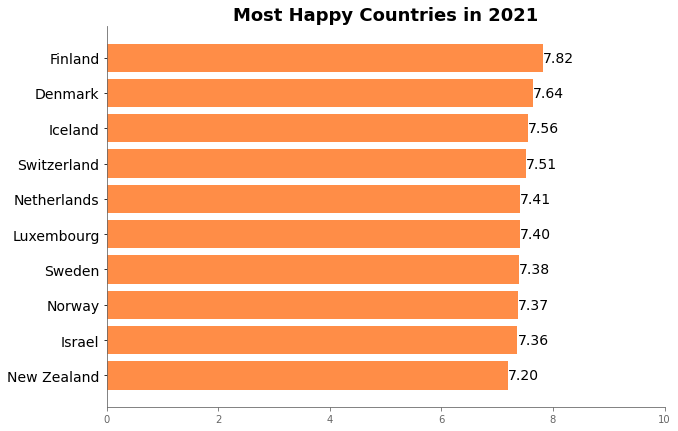

In [376]:
fig, ax = plt.subplots(figsize=(10,7))
bars = ax.barh(top_10.Country, top_10['Happiness score'], color='#ff8d47')
#labels
for bar in bars:
    width = bar.get_width()
    label_y_pos = bar.get_y() + bar.get_height()/2
    ax.text(width, label_y_pos, s=f'{width:.2f}', ha='left', va='center', fontsize=14)

ax.tick_params(axis='x', colors='#666666')
ax.tick_params(axis='y', labelsize=14)
  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#666666')
ax.spines['bottom'].set_color('#666666')

ax.set_xlim(left=0, right=10)
ax.set_title('Most Happy Countries in 2021', fontdict={'fontsize': 18, 'fontweight': 'bold'})
plt.show()

### Least Happy Countries in 2021

In [377]:
# find bottom 10 countries in 2021
max_rank = whr_region.loc[whr_region['Year']==2021].max()['Rank']
bottom_10 = whr_region.loc[(whr_region['Year']==2021)& (whr_region['Rank']>max_rank-10)][['Country','Rank','Happiness score']].sort_values(['Happiness score'], ascending=True)
bottom_10

,Country,Rank,Happiness score
145,Afghanistan,146.0,2.4038
144,Lebanon,145.0,2.9553
143,Zimbabwe,144.0,2.9951
142,Rwanda,143.0,3.2682
141,Botswana,142.0,3.4711
140,Lesotho,141.0,3.5118
139,Sierra Leone,140.0,3.5740
138,Tanzania,139.0,3.7024
137,Malawi,138.0,3.7504
136,Zambia,137.0,3.7598


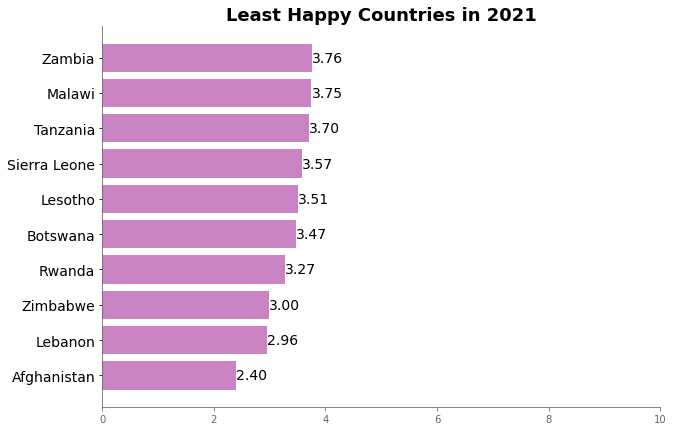

In [378]:
fig, ax = plt.subplots(figsize=(10,7))
bars = ax.barh(bottom_10['Country'], bottom_10['Happiness score'], color='#c983c3')

for bar in bars:
    width =bar.get_width()
    label_y_pos = bar.get_y()+bar.get_height()/2
    ax.text(width, label_y_pos,s=f'{width:.2f}', va='center', ha='left', fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#666666')
ax.spines['left'].set_color('#666666')

ax.tick_params(axis='x', colors='#666666')
ax.tick_params(axis='y', labelsize=14)
ax.set_xlim(0,10)

ax.set_title('Least Happy Countries in 2021', fontsize=18, fontweight='bold')

plt.show()

### Happiness by Region

In [379]:
region_score = whr_region.groupby(['Year','Regional indicator']).mean()['Happiness score']
region_score = region_score.reset_index()
region_score


,Year,Regional indicator,Happiness score
0,2014,Central and Eastern Europe,5.365824
1,2014,Commonwealth of Independent States,5.286333
2,2014,East Asia,5.626167
3,2014,Latin America and Caribbean,6.144682
4,2014,Middle East and North Africa,5.357476
...,...,...,...
75,2021,North America and ANZ,7.090950
76,2021,South Asia,4.265150
77,2021,Southeast Asia,5.431744
78,2021,Sub-Saharan Africa,4.479706


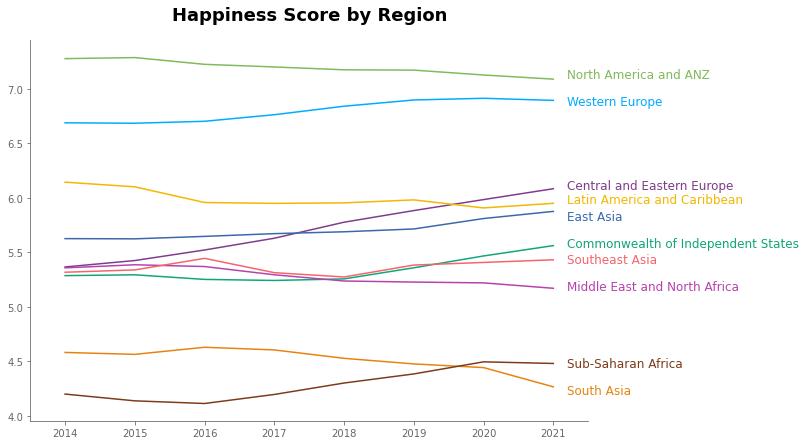

In [680]:
# Colors used to shade regions
color_scale = [ "#7F3C8D", "#11A579", "#3969AC", "#F2B701", "#B742ac", "#80BA5A", "#E68310", "#F5646c", "#7d3b1a", "#00acff"]
# y coordinate for labels
label_y_pos = [6.08, 5.55, 5.8, 5.95, 5.15, 7.1, 4.2, 5.4, 4.45, 6.85]

fig, ax = plt.subplots(figsize=(10,7))

for ind, region in enumerate(region_score['Regional indicator'].unique()):
    y = region_score['Happiness score'].loc[region_score['Regional indicator']==region]
    x = region_score['Year'].unique()
    ax.plot(x, y, label = region, color=color_scale[ind])
    # label_y_pos = region_score['Happiness score'].loc[(region_score['Regional indicator']==region) & (region_score['Year']==2021)]
    ax.text(x=2021.2, y=label_y_pos[ind], s=region, color=color_scale[ind], fontfamily='sans', fontsize=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('#666666')
ax.spines['left'].set_color('#666666')
ax.tick_params(axis='x', colors='#666666')
ax.tick_params(axis='y', colors='#666666')

ax.set_title("Happiness Score by Region", fontsize=18, fontweight='bold', pad=20)

ax.set_xlim(2013.5, 2021.5)
plt.show()

### Dystopia over Time

In [388]:
whr_region.head()

,Country,Year,Happiness score,Dystopia,Residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Regional indicator,Rank
0,Finland,2021,7.8210,1.83,0.688052,1.891628,1.258108,0.775206,0.735590,0.108733,0.533658,Western Europe,1.0
1,Denmark,2021,7.6362,1.83,0.395632,1.952595,1.242681,0.776644,0.718918,0.187626,0.532079,Western Europe,2.0
2,Iceland,2021,7.5575,1.83,0.490185,1.935726,1.319914,0.802622,0.718194,0.269616,0.191204,Western Europe,3.0
3,Switzerland,2021,7.5116,1.83,0.322746,2.025970,1.226074,0.822048,0.676947,0.146822,0.461004,Western Europe,4.0
4,Netherlands,2021,7.4149,1.83,0.306937,1.944578,1.205848,0.786738,0.650682,0.271076,0.419083,Western Europe,5.0


In [399]:
# Select dystopia for each year
dystopia=whr_region.groupby(['Year']).mean()['Dystopia']
dystopia

Year
2014    2.098976
2015    2.330000
2016    1.850000
2017    1.920000
2018    1.880000
2019    1.972317
2020    2.430343
2021    1.830000
Name: Dystopia, dtype: float64

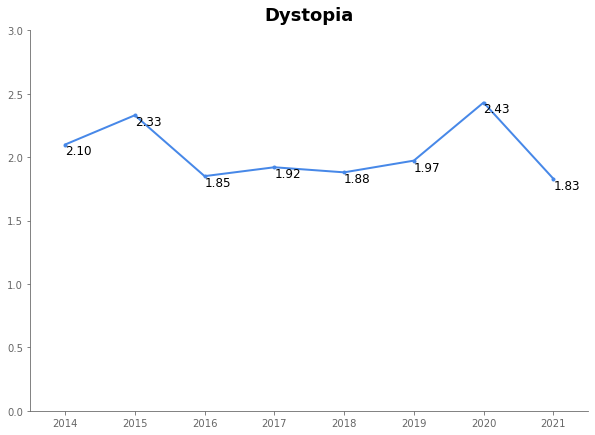

In [679]:
fig, ax = plt.subplots(figsize=(10,7))

line = ax.plot(dystopia, linewidth=2, marker='.', color='#4788E8')
for ind, point in dystopia.iteritems():
    ax.annotate(f'{point:.2f}', xy=(ind, point), va='top', ha='left', fontsize=12)

ax.set_title('Dystopia', fontsize=18, fontweight='bold', pad=10)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('#666666')
ax.spines['left'].set_color('#666666')
ax.tick_params(axis='x', colors='#666666')
ax.tick_params(axis='y', colors='#666666')

ax.set_ylim(0,3)
ax.set_xlim(2013.5, 2021.5)

plt.show()

In [406]:
dystopia.index

Int64Index([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='int64', name='Year')

### Most Happy Coutnries

In [646]:
# filter countries that have ever been in top 10
rank_10_df = whr_region[['Country', 'Year', 'Rank']].loc[whr_region['Rank']<=10]
rank_10_df

,Country,Year,Rank
0,Finland,2021,1.0
1,Denmark,2021,2.0
2,Iceland,2021,3.0
3,Switzerland,2021,4.0
4,Netherlands,2021,5.0
...,...,...,...
1077,Finland,2014,6.0
1078,Netherlands,2014,7.0
1079,Sweden,2014,8.0
1080,New Zealand,2014,9.0


In [647]:
# pivot df to be used in heatmap chart
rank_10=rank_10_df.pivot(index=['Country'],columns=['Year'], values=['Rank'])
rank_10.columns = [col[1] for col in rank_10.columns.to_flat_index()]
rank_10

,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,
Australia,10.0,9.0,10.0,10.0,NaN,NaN,NaN,NaN
Austria,NaN,NaN,NaN,NaN,10.0,9.0,10.0,NaN
Canada,5.0,6.0,7.0,7.0,9.0,NaN,NaN,NaN
Denmark,3.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0
Finland,6.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0
Iceland,2.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0
Israel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
Luxembourg,NaN,NaN,NaN,NaN,NaN,10.0,8.0,6.0
Netherlands,7.0,7.0,6.0,6.0,5.0,6.0,5.0,5.0


In [648]:
# sort countries by highest rank over time
# store country order in dictionary
sorted_countries = rank_10.mean(axis=1, skipna=False).sort_values().index.to_list()
sort_dict = dict(zip(sorted_countries, np.arange(0,13)))
sort_dict

{'Denmark': 0,
 'Finland': 1,
 'Iceland': 2,
 'Switzerland': 3,
 'Norway': 4,
 'Netherlands': 5,
 'Sweden': 6,
 'New Zealand': 7,
 'Australia': 8,
 'Austria': 9,
 'Canada': 10,
 'Israel': 11,
 'Luxembourg': 12}

In [649]:
# sort df to show countries with the highest rank at the top
rank_10['Sorted'] = rank_10.index.map(sort_dict)
rank_10 = rank_10.sort_values(['Sorted'])
rank_10.drop(['Sorted'], axis=1, inplace=True)
rank_10

,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,
Denmark,3.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0
Finland,6.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0
Iceland,2.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0
Switzerland,1.0,2.0,4.0,5.0,6.0,3.0,3.0,4.0
Norway,4.0,4.0,1.0,2.0,3.0,5.0,6.0,8.0
Netherlands,7.0,7.0,6.0,6.0,5.0,6.0,5.0,5.0
Sweden,8.0,10.0,9.0,9.0,7.0,7.0,7.0,7.0
New Zealand,9.0,8.0,8.0,8.0,8.0,8.0,9.0,10.0
Australia,10.0,9.0,10.0,10.0,NaN,NaN,NaN,NaN


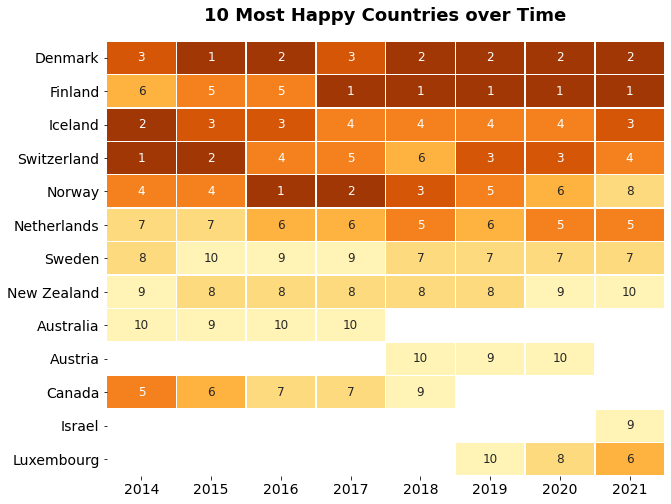

In [677]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(rank_10, annot=True, annot_kws={"fontsize":12}, cbar=False, cmap=sns.color_palette("YlOrBr_r"), linewidth=.5)

ax.set_title('10 Most Happy Countries over Time', fontsize=18, fontweight='bold', pad=20)

ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.set(ylabel="")

plt.show()
